In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
heart_factors = pd.read_csv("/content/framingham (1).csv")
heart_factors.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
import os

In [4]:
os.getcwd()

'/content'

In [5]:
# getting num of rows and columns in database
heart_factors.shape

(4240, 16)

In [6]:
#getting info about data
heart_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
#checking for missing values
heart_factors.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [8]:
heart_factors['education'].fillna(heart_factors['education'].median(),inplace=True)
heart_factors['cigsPerDay'].fillna(heart_factors['cigsPerDay'].median(),inplace=True)
heart_factors['BPMeds'].fillna(heart_factors['BPMeds'].median(),inplace=True)
heart_factors['totChol'].fillna(heart_factors['totChol'].median(),inplace=True)
heart_factors['BMI'].fillna(heart_factors['BMI'].median(),inplace=True)
heart_factors['heartRate'].fillna(heart_factors['heartRate'].median(),inplace=True)
heart_factors['glucose'].fillna(heart_factors['glucose'].median(),inplace=True)

/tmp/ipython-input-4021360538.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_factors['education'].fillna(heart_factors['education'].median(),inplace=True)
/tmp/ipython-input-4021360538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [9]:
heart_factors.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [10]:
# statistical measure about the data
heart_factors.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
# checking the distribution ofTarget value
heart_factors['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3596
1,644


In [12]:
# Splitting the Features and Target
X = heart_factors.drop(columns='TenYearCHD',axis=1)
Y = heart_factors['TenYearCHD']
print(X)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     0.0   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [13]:
#splitting the data into training data & test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(4240, 15) (3392, 15) (848, 15)


In [15]:
#model training
#logistic regression
model=LogisticRegression()

#training the logistic regression model withtraining data
model.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
LogisticRegression()

LogisticRegression()

In [17]:
#Model Evaluation
#Accuracy score
#accuray on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on training data : ' ,training_data_accuracy)

Accuracy on training data :  0.8514150943396226


In [18]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data : ' , test_data_accuracy)

Accuracy on test data :  0.8490566037735849


In [19]:
#building a predictive system

import numpy as np
input_data = (43,1,1,30,0,0,1,0,225,162,107,23,61,93,88)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data) # Corrected variable name from input_data_as_ndeumpy_array to input_data_as_numpy_array

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Diseases')

[1]
The Person has Heart Diseases


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
#decision tree classifier
dc_clf = DecisionTreeClassifier()
dc_clf.fit(X_train,Y_train)

dlf_pred = dc_clf.predict(X_test)
print(accuracy_score(Y_test,dlf_pred))


0.7582547169811321


In [21]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier from sklearn.ensemble
rc_clf = RandomForestClassifier()
rc_clf.fit(X_train,Y_train)

Rfc_pred = rc_clf.predict(X_test)
print(accuracy_score(Y_test,Rfc_pred))

0.8431603773584906


In [22]:
#SVM Classifier
svm_clf = SVC()
svm_clf.fit(X_train,Y_train)

svm_pred = rc_clf.predict(X_test)
print(accuracy_score(Y_test , svm_pred))


0.8431603773584906


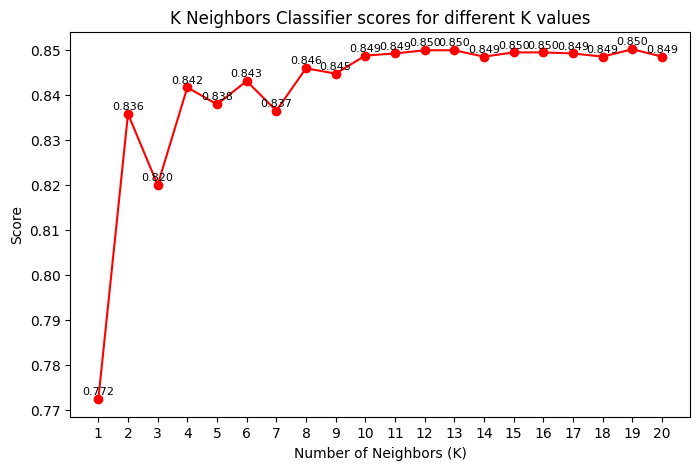

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Define knn_score before the loop
knn_score = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, Y, cv=10)
    knn_score.append(score.mean())

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), knn_score, color='red', marker='o')

# Add only score values as labels
for i in range(1, 21):
    plt.text(i, knn_score[i-1] + 0.001, f"{knn_score[i-1]:.3f}",
             ha='center', fontsize=8)

plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()


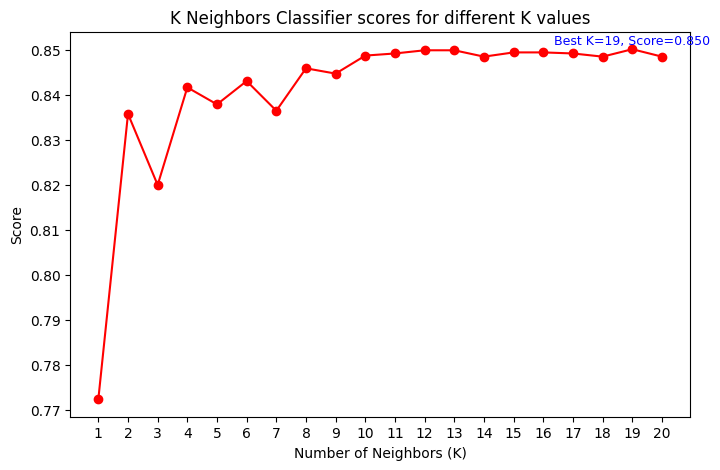

In [27]:
best_k = range(1, 21)[knn_score.index(max(knn_score))]
best_score = max(knn_score)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), knn_score, color='red', marker='o')
plt.text(best_k, best_score + 0.001, f"Best K={best_k}, Score={best_score:.3f}",
         ha='center', fontsize=9, color='blue')

plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()


In [31]:
# Calculate accuracy scores for each model
from sklearn.metrics import accuracy_score

# Assuming dc_clf, rc_clf, svm_clf, and knn_classifier are your trained models
dc_accuracy = accuracy_score(Y_test, dc_clf.predict(X_test))
rf_accuracy = accuracy_score(Y_test, rc_clf.predict(X_test))
svm_accuracy = accuracy_score(Y_test, svm_clf.predict(X_test))

# Store accuracy results in a dictionary
accuracy_results = {
    "Decision Tree": dc_accuracy,
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy,
}

# Identify the best model
best_model = max(accuracy_results, key=accuracy_results.get)
print(f"\nBest Model: {best_model} with Accuracy: {accuracy_results[best_model]:.2%}")




Best Model: SVM with Accuracy: 84.79%
